# Skyline Problem: Vertical Line Sweep Algo

In [25]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

In [26]:
import heapq as hq
def getSkyline(buildings):
    '''
    Purpose:
        Compute the contour line of a list of rectangle buildings that are all grounded on y=0, and
        return the skyline of the buildings.
    Parameters:
        buildings : a list of lists where buildings[i] = [lefti, righti, heighti] where
                         - lefti is the x coordinate of the left edge of the ith building.
                         - righti is the x coordinate of the right edge of the ith building.
                         - heighti is the height of the ith building.
    Return:
        a list of "key points" sorted by their x-coordinate in the form [[x1,y1],[x2,y2],...]. 
        Each key point is the left endpoint of some horizontal segment in the skyline except the 
        last point in the list, which always has a y-coordinate 0 and is used to mark the skyline's 
        termination where the rightmost building ends.
    '''

    tallq = [] 
    res = [] 
    prev = -1 

    for b in buildings:
        # check previous stopping points 
        while tallq and tallq[0][1] <= b[0]:
            stoppingPt = tallq[0][1]
            height = tallq[0][0]
            hq.heappop(tallq)
            while tallq and (tallq[0][1] <= stoppingPt):
                hq.heappop(tallq)
            if tallq and tallq[0][0] != height:
                res.append([stoppingPt, -tallq[0][0]])
            elif not tallq:
                res.append([stoppingPt, 0])
        # consider adding the current pt 
        if not (tallq and (tallq[0][0] == -b[2] or (tallq[0][0] < -b[2] and tallq[0][1] > b[0]))):
            if res and res[-1][0] == b[0]:
                res[-1][1] = max(b[2], res[-1][1])
                if len(res) >= 2 and res[-2][1] == res[-1][1]:
                    res = res[:-1]
            else:
                res.append([b[0], b[2]])

        # maintain invarients: tallest building live beyond this point
        while tallq and tallq[0][1] == b[0]:
            hq.heappop(tallq)

        hq.heappush(tallq, [-b[2], b[1]])
        prev = b[0]

    # check the rest stopping points 
    while tallq:
        stoppingPt = tallq[0][1]
        height = tallq[0][0]
        hq.heappop(tallq)
        while tallq and tallq[0][1] <= stoppingPt:
            hq.heappop(tallq)
        if tallq and tallq[0][0] != height:
            res.append([stoppingPt, -tallq[0][0]])
        elif not tallq:
            res.append([stoppingPt, 0])
        prev = stoppingPt

    print(res)
    # remove duplicates 
    distinctRes = []
    prev = [-1, -1]
    for i in range(len(res)):
        if res[i][1] != prev[1] and res[i][0] != prev[0]:
            distinctRes.append(res[i])
        if res[i][0] == prev[0]:
            distinctRes[-1][1] = max(distinctRes[-1][1], res[i][1])
        prev = distinctRes[-1]

    return res
buildings = [[0,2,3],[2,5,3]]
buildings2 = [[2,9,10],[3,7,15],[5,12,12],[15,20,10],[19,24,8]]
getSkyline(buildings2)

[[2, 10], [3, 15], [7, 12], [12, 0], [15, 10], [20, 8], [24, 0]]


[[2, 10], [3, 15], [7, 12], [12, 0], [15, 10], [20, 8], [24, 0]]

In [71]:
def drawRectangles(buildings, xRange, yRange):
    '''
    Purpose: 
        Plot the outline of the given rectangle buildings
    Parameters:
        buildlings : a list of lists - same as in getSkyline function
        xRange : the max x-coord shown on canvas
        yRange : the max y-coord shown on canvas
    Return:
        None
    '''
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    N = len(buildings)
    xs = []
    ys = []
    ws = []
    hs = []
    for b in buildings:
        xs.append(b[0])
        ys.append(0)
        ws.append(b[1] - b[0])
        hs.append(b[2])
    vs = np.random.randn(N)
    normal = pl.Normalize(vs.min(), vs.max())
    colors = pl.cm.jet(normal(vs))

    ax = pl.subplot(111)
    for x,y,w,h,c in zip(xs,ys,ws,hs,colors):
        rect = pl.Rectangle((x,y),w,h,color=c,fill=None)  #remove the fill=None to show colors filled in rectangles
        ax.add_patch(rect)

    ax.set_xlim(0,xRange)  #320
    ax.set_ylim(0,yRange)  #60
    pl.show()


In [69]:
def drawContour(res, xRange, yRange):
    '''
    Purpose:
        Plot the computed skyline of the buildings
    Parameters:
        res : the skyline that the getSkyline function would return (as a list of sorted points)
        xRange : the width of the canvas
        yRange : the height of the canvas
    Return:
        None
    '''
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(0, xRange)
    plt.ylim(0, yRange)
    color = '#000000'
    
    prevx = 0
    prevy = 0

    for c in after:
        plt.plot(c[0], c[1], marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red")
        
        # draw a horizontal  line 
        xs = [prevx, c[0]]
        ys = [prevy, prevy]
        plt.plot(xs, ys, c=color)

        # draw a vertical line
        x_values = [c[0], c[0]]
        y_values = [prevy, c[1]]
        plt.plot(x_values, y_values, c=color)
        prevx, prevy = c[0], c[1]

    plt.show()


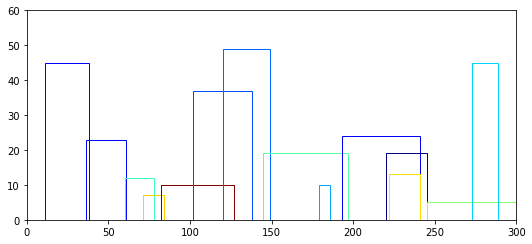

[[11, 45], [38, 23], [61, 12], [78, 7], [82, 10], [102, 37], [120, 49], [149, 19], [193, 24], [241, 19], [245, 5], [273, 45], [289, 5], [302, 0]]


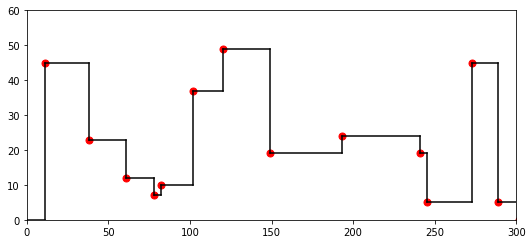

In [82]:
# Randomly-generated Testing Cases

import random
N = 15      # number of rectangles
width = 30  # max-width of each rectangle
prev = 10   # smallest starting point of 1st rectangle
xs,ys,ws = [],[],[]

for i in range(20, N * 20, 20):
    xs.append(random.randint(prev,i))
    ys.append(random.randint(i, i+50))
    ws.append(random.randint(5, 50))
    prev = i
    
buildings = [list(ele) for ele in list(zip(xs, ys, ws))]
xRange = 300
yRange = 60

drawRectangles(buildings, xRange, yRange)
after = getSkyline(buildings)
drawContour(after, xRange, yRange)

In [81]:
test6 = test
test6

[[13, 62, 24],
 [24, 42, 41],
 [46, 69, 30],
 [61, 89, 34],
 [84, 132, 29],
 [117, 161, 14],
 [125, 182, 23],
 [149, 168, 14],
 [168, 193, 18],
 [196, 208, 18],
 [212, 261, 12],
 [222, 241, 16],
 [258, 300, 5],
 [266, 300, 27]]

## Resources

In [ ]:
import matplotlib.colorbar as cbar
import pylab as pl
import numpy as np

N = 50
xs = np.random.randint(0, 100, N)
ys = np.random.randint(0, 100, N)
ws = np.random.randint(10, 20, N)
hs = np.random.randint(10, 20, N)
vs = np.random.randn(N)
normal = pl.Normalize(vs.min(), vs.max())
colors = pl.cm.jet(normal(vs))

ax = pl.subplot(111)
for x,y,w,h,c in zip(xs,ys,ws,hs,colors):
    rect = pl.Rectangle((x,y),w,h,color=c)
    ax.add_patch(rect)

cax, _ = cbar.make_axes(ax) 
cb2 = cbar.ColorbarBase(cax, cmap=pl.cm.jet,norm=normal) 

ax.set_xlim(0,120)
ax.set_ylim(0,120)
pl.show()

In [ ]:
import random
r = lambda: random.randint(0,255)
color = '#%02X%02X%02X' % (r(),r(),r())
print(color)

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()


In [75]:
# Built Testing Cases 
test1 = [[2,9,10],[3,7,15],[5,12,12],[15,20,10],[19,24,8]]
test2 = [[15, 47, 36],
 [23, 58, 17],
 [57, 73, 47],
 [73, 111, 21],
 [98, 118, 23],
 [101, 151, 21],
 [121, 160, 39],
 [142, 174, 24],
 [174, 188, 5],
 [199, 205, 25],
 [214, 252, 12],
 [235, 258, 47],
 [243, 287, 13],
 [277, 327, 37]]

test3 = [[0,2,3],[2,5,3]]

test4 = [[13, 62, 24],
 [24, 42, 41],
 [46, 69, 30],
 [61, 89, 34],
 [84, 132, 29],
 [117, 161, 14],
 [125, 182, 23],
 [149, 168, 14],
 [168, 193, 18],
 [196, 208, 18],
 [212, 261, 12],
 [222, 241, 16],
 [258, 300, 5],
 [266, 300, 27]]
